In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\3.concertriccir2.csv",header=None)

In [4]:
data.shape

(500, 3)

In [5]:
data.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

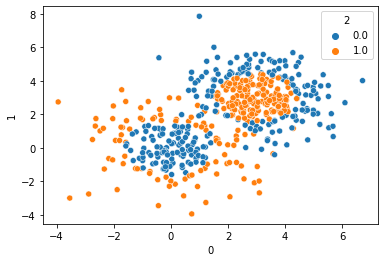

In [6]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [7]:
data[2].value_counts()

0.0    250
1.0    250
Name: 2, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [10]:
x_train.shape

(450, 2)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
std=StandardScaler()

In [13]:
stdd=std.fit_transform(x_train)

In [14]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: google-auth<3,>=1.6.3 in c:\users\dell\anaconda3\lib\site-packages (from tensorboard<2.12,>=2.11->tensorflow-intel==2.11.0->tensorflow) (1.33.0)




[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import tensorflow

In [16]:
import tensorflow.keras 

In [17]:
from tensorflow.keras import Sequential

In [18]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(5,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [89]:
model=Sequential()
model.add(Dense(1000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [90]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1000)              3000      
                                                                 
 batch_normalization_24 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 1000)              0         
                                                                 
 dense_31 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_25 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 1000)             

In [91]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [92]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
36/36 [==============================] - 8s 63ms/step - loss: 1.0048 - accuracy: 0.6500 - val_loss: 16.7655 - val_accuracy: 0.4333
Epoch 2/20
36/36 [==============================] - 2s 47ms/step - loss: 1.2274 - accuracy: 0.6389 - val_loss: 8.6657 - val_accuracy: 0.5333
Epoch 3/20
36/36 [==============================] - 2s 48ms/step - loss: 0.8676 - accuracy: 0.6833 - val_loss: 4.6908 - val_accuracy: 0.5111
Epoch 4/20
36/36 [==============================] - 2s 47ms/step - loss: 0.8114 - accuracy: 0.6694 - val_loss: 1.6731 - val_accuracy: 0.6000
Epoch 5/20
36/36 [==============================] - 2s 47ms/step - loss: 0.7610 - accuracy: 0.6833 - val_loss: 1.3580 - val_accuracy: 0.5889
Epoch 6/20
36/36 [==============================] - 2s 47ms/step - loss: 0.6838 - accuracy: 0.6972 - val_loss: 0.6247 - val_accuracy: 0.7000
Epoch 7/20
36/36 [==============================] - 2s 48ms/step - loss: 0.6844 - accuracy: 0.6972 - val_loss: 0.4603 - val_accuracy: 0.7889
Epoch 8/20
3

In [93]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

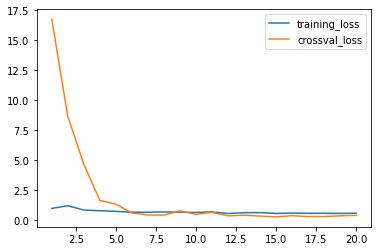

In [94]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")
plt.legend()

In [95]:
predi=model.predict(x_train)

15/15 [==============================] - 0s 10ms/step


In [96]:
import numpy as np

In [97]:
preict=np.where(predi>0.5,1,0).flatten()

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_train,preict)


0.8422222222222222

In [100]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 39s 10ms/step


<AxesSubplot:>

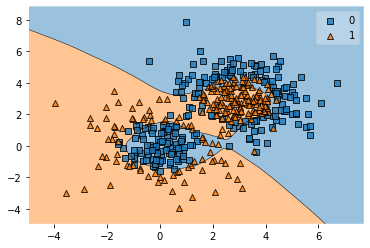

In [101]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)